In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet


In [105]:
college = pd.read_csv('./data/college_senti_zeroed.csv')
opins = pd.read_csv('./data/opins_senti_oned.csv')

In [106]:
df = pd.concat([opins, college], axis = 0)

In [107]:
df.to_csv('data/combined_posts.csv', index=False)

In [108]:
data = pd.read_csv('data/combined_posts.csv')

In [109]:
data.head(2)

,created_utc,subreddit,post,post_length,post_word_count,sent_score
0,1.597545e+09,unpopularopinion,Middle aged guys don't buy sports cars because...,1646,310,1
1,1.613406e+09,unpopularopinion,"""Y'all"" is a brilliant use of the English lang...",885,179,1


In [110]:
data.shape

(3584, 6)

In [111]:
data.drop(['created_utc','post_length', 'post_word_count', 'subreddit'], axis = 1, inplace = True)

In [112]:
data.head(2)

,post,sent_score
0,Middle aged guys don't buy sports cars because...,1
1,"""Y'all"" is a brilliant use of the English lang...",1


In [113]:
data.shape

(3584, 2)

# Preparing data for EDA

In [114]:
# Converting text to lower case

data['post'] = data['post'].str.lower()

In [115]:
# removing chars and web addresses like https, www, .com from text
import re
def remove_chars(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\d+', ' ', text)
    return text

In [116]:
# removing chars and web addresses like https, www, .com from text
data['post_nochars'] = data['post'].apply(remove_chars)

In [117]:
data['post_nochars'][2]

'i always eat dessert before dinner at a restaurantwhen at a restaurant, waiting staff always find it weird when i order the dessert before the appetizer and the main course. they ask “oh, is that all that you’re having?”. i’m like “no… i just want my cheesecake first, please”. i have to convince them that i’m just a dessert first kinda guy. i feel like the main course is much more enjoyable when your dopamine levels are boosted.'

In [118]:
# text tokenization
tokenizer = nltk.RegexpTokenizer(r'\w+')
data['post_tokenized'] = data['post_nochars'].apply(tokenizer.tokenize)

In [119]:
len(data['post_tokenized'][2])

81

In [120]:
print(data['post_tokenized'][2])

['i', 'always', 'eat', 'dessert', 'before', 'dinner', 'at', 'a', 'restaurantwhen', 'at', 'a', 'restaurant', 'waiting', 'staff', 'always', 'find', 'it', 'weird', 'when', 'i', 'order', 'the', 'dessert', 'before', 'the', 'appetizer', 'and', 'the', 'main', 'course', 'they', 'ask', 'oh', 'is', 'that', 'all', 'that', 'you', 're', 'having', 'i', 'm', 'like', 'no', 'i', 'just', 'want', 'my', 'cheesecake', 'first', 'please', 'i', 'have', 'to', 'convince', 'them', 'that', 'i', 'm', 'just', 'a', 'dessert', 'first', 'kinda', 'guy', 'i', 'feel', 'like', 'the', 'main', 'course', 'is', 'much', 'more', 'enjoyable', 'when', 'your', 'dopamine', 'levels', 'are', 'boosted']


In [121]:
# remove stopwords
def remove_stopwords(words):
    new_words = [token for token in words if token not in stopwords.words('english')]
    return new_words

In [122]:
data['post_tokenized'] = data['post_tokenized'].apply(remove_stopwords)

In [123]:
data['post_tokenized'][2]

['always',
 'eat',
 'dessert',
 'dinner',
 'restaurantwhen',
 'restaurant',
 'waiting',
 'staff',
 'always',
 'find',
 'weird',
 'order',
 'dessert',
 'appetizer',
 'main',
 'course',
 'ask',
 'oh',
 'like',
 'want',
 'cheesecake',
 'first',
 'please',
 'convince',
 'dessert',
 'first',
 'kinda',
 'guy',
 'feel',
 'like',
 'main',
 'course',
 'much',
 'enjoyable',
 'dopamine',
 'levels',
 'boosted']

#### Text lemmatization

In [124]:
# Parts-of-speech tagging 

#https://stackoverflow.com/questions/15586721/wordnet-lemmatization-and-pos-tagging-in-python
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

In [125]:
wn = WordNetLemmatizer()
def lemmatize_list(lwords):
    tags = nltk.pos_tag(lwords)
    tagged = [(word, get_wordnet_pos(tag)) for (word, tag) in tags]
    lemmatized_words = [wn.lemmatize(word, tag) if tag != '' else word for (word, tag) in tagged]
    return lemmatized_words

In [126]:
# lemmatizing the text
data['post_lemmatized'] = data['post_tokenized'].apply(lemmatize_list)

In [127]:
data['post_lemmatized']

0       [middle, age, guy, buy, sport, car, mid, life,...
1       [brilliant, use, english, language, refuse, te...
2       [always, eat, dessert, dinner, restaurantwhen,...
3       [illegal, company, list, entry, level, job, re...
4       [news, dry, recitation, fact, opinion, intend,...
                              ...                        
3579    [rough, st, semesteri, finish, first, semester...
3580    [many, flashcard, make, study, exam, take, try...
3581    [grade, receive, first, ever, uni, college, es...
3582    [mental, health, kill, semester, campus, resou...
3583    [mess, please, help, maintain, attendance, int...
Name: post_lemmatized, Length: 3584, dtype: object

In [128]:
data['joined_words'] = data["post_lemmatized"].map(' '.join)
data.head(5)

,post,sent_score,post_nochars,post_tokenized,post_lemmatized,joined_words
0,middle aged guys don't buy sports cars because...,1,middle aged guys don't buy sports cars because...,"[middle, aged, guys, buy, sports, cars, mid, l...","[middle, age, guy, buy, sport, car, mid, life,...",middle age guy buy sport car mid life crisis f...
1,"""y'all"" is a brilliant use of the english lang...",1,"""y'all"" is a brilliant use of the english lang...","[brilliant, use, english, language, refuse, to...","[brilliant, use, english, language, refuse, te...",brilliant use english language refuse tell oth...
2,i always eat dessert before dinner at a restau...,1,i always eat dessert before dinner at a restau...,"[always, eat, dessert, dinner, restaurantwhen,...","[always, eat, dessert, dinner, restaurantwhen,...",always eat dessert dinner restaurantwhen resta...
3,it should be illegal for a company to list an ...,1,it should be illegal for a company to list an ...,"[illegal, company, list, entry, level, job, re...","[illegal, company, list, entry, level, job, re...",illegal company list entry level job require y...
4,news should be a dry recitation of facts. if i...,1,news should be a dry recitation of facts. if i...,"[news, dry, recitation, facts, opinion, intend...","[news, dry, recitation, fact, opinion, intend,...",news dry recitation fact opinion intend stir e...


In [129]:
# drop redundant columns
data.drop(columns = ['post_lemmatized', 'post_nochars', 'post_tokenized','post_tokenized'], inplace = True)

In [130]:
# reorganize columns
data = data.reindex(columns=['sent_score', 'post', 'joined_words'])

In [131]:
data.head(3)

,sent_score,post,joined_words
0,1,middle aged guys don't buy sports cars because...,middle age guy buy sport car mid life crisis f...
1,1,"""y'all"" is a brilliant use of the english lang...",brilliant use english language refuse tell oth...
2,1,i always eat dessert before dinner at a restau...,always eat dessert dinner restaurantwhen resta...


In [132]:
# create new columns for post_lengths before and after lemmatization
data['post_length'] = data['post'].str.len()
data['joined_length'] = data['joined_words'].str.len()

In [133]:
data.head(2)

,sent_score,post,joined_words,post_length,joined_length
0,1,middle aged guys don't buy sports cars because...,middle age guy buy sport car mid life crisis f...,1646,938
1,1,"""y'all"" is a brilliant use of the english lang...",brilliant use english language refuse tell oth...,885,452


In [134]:
data['pst_wrd_cnt'] = data['post'].str.split().str.len()

In [135]:
data['jnd_wrd_cnt'] = data['joined_words'].str.split().str.len()

In [156]:
data.head(2)

,sent_score,post,joined_words,post_length,joined_length,pst_wrd_cnt,jnd_wrd_cnt
0,1,middle aged guys don't buy sports cars because...,middle age guy buy sport car mid life crisis f...,1646,938,310,145
1,1,"""y'all"" is a brilliant use of the english lang...",brilliant use english language refuse tell oth...,885,452,179,75


In [159]:
data['pst_wrd_cnt'].sum()

590194

In [158]:
data['jnd_wrd_cnt'].sum()

285079

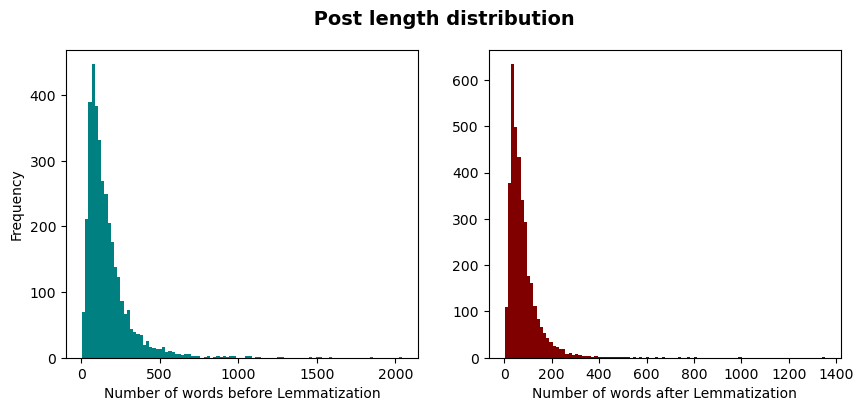

In [137]:
# Distribution of words in each post before and after lemmatization

fig, (axes) = plt.subplots(1,2, figsize = (10, 4))
axes[0].hist(data['pst_wrd_cnt'], color = 'teal', bins = 100)
axes[1].hist(data['jnd_wrd_cnt'], color = 'maroon', bins = 100)

axes[0].set_xlabel('Number of words before Lemmatization')
axes[0].set_ylabel('Frequency')
axes[1].set_xlabel('Number of words after Lemmatization')
fig.suptitle(' Post length distribution', weight ='bold', fontsize = 14);

In [138]:
grouped_posts = data.groupby('sent_score')
grouped_posts.count()

,post,joined_words,post_length,joined_length,pst_wrd_cnt,jnd_wrd_cnt
sent_score,,,,,,
0,1670,1670,1670,1670,1670,1670
1,1914,1914,1914,1914,1914,1914


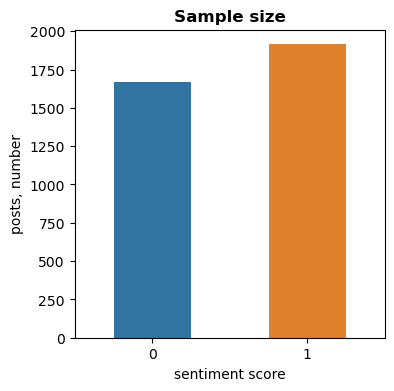

In [139]:
plt.figure(figsize = (4,4))
sns.countplot(x = 'sent_score', data = data, width = 0.5)
plt.xlabel('sentiment score')
plt.ylabel('posts, number')
plt.title('Sample size', weight ='bold');

In [140]:
# Descriptive stat on word count before and after lemmatization
stat = data[['pst_wrd_cnt', 'jnd_wrd_cnt']].describe().round(2)

In [141]:
stat

,pst_wrd_cnt,jnd_wrd_cnt
count,3584.00,3584.00
mean,164.67,79.54
std,148.26,72.60
min,5.00,2.00
25%,76.00,37.00
50%,125.00,61.00
75%,204.00,97.00
max,2044.00,1352.00


### EDA on Word Counts

In [142]:
fre_words = data['joined_words']

In [143]:
#instantiate a CounterVectorizer
cvec = CountVectorizer()
cvec.fit(fre_words)

CountVectorizer()

In [144]:
fre_words_vecs = cvec.fit_transform(fre_words)

In [145]:
fre_words_vecs, fre_words_vecs.size

(<3584x17255 sparse matrix of type '<class 'numpy.int64'>'
 	with 208228 stored elements in Compressed Sparse Row format>,
 208228)

In [146]:
fre_words_vec_features = cvec.get_feature_names_out()

In [147]:
fre_words_vec_features[25:50]

array(['abnormal', 'abolish', 'abolished', 'abolishednow',
       'abolishedthat', 'abomination', 'abominations', 'abort',
       'abortion', 'abound', 'abour', 'abouti', 'aboutpart', 'aboutpoor',
       'abouts', 'abrasive', 'abrasiveness', 'abroad', 'abruptly', 'abs',
       'absence', 'absences', 'absent', 'absentia', 'absolute'],
      dtype=object)

In [148]:
data_words_df = pd.DataFrame(fre_words_vecs.toarray(),
                    columns = cvec.get_feature_names_out())

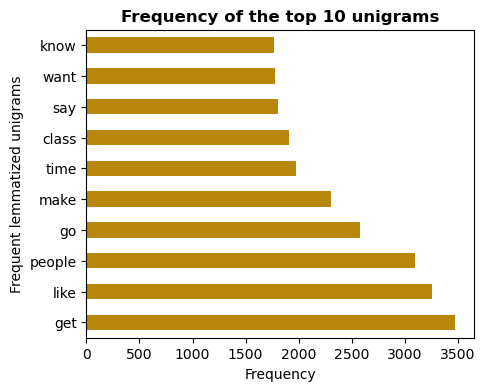

In [149]:
data_words_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', color = 'darkgoldenrod', figsize = (5, 4));
plt.xlabel("Frequency")
plt.ylabel("Frequent lemmatized unigrams")
plt.title("Frequency of the top 10 unigrams", weight ='bold', fontsize = 12);

#### Most common bigrams

In [150]:
cvec_bigrams = CountVectorizer(ngram_range = (2,2))

cvec_bigrams.fit(data['joined_words'])

cvec_bigram_fit = cvec_bigrams.transform(data['joined_words'])

cvec_bigrams_df = pd.DataFrame(cvec_bigram_fit.toarray(),
                    columns = cvec_bigrams.get_feature_names_out())

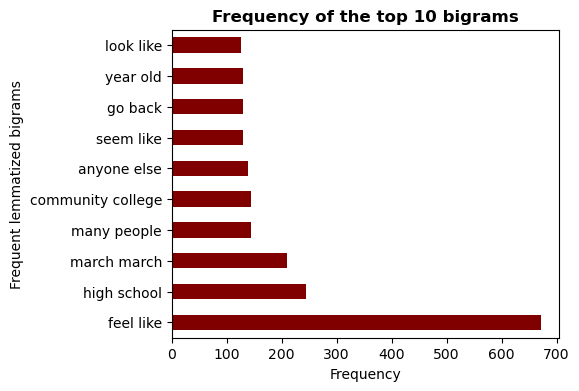

In [151]:
cvec_bigrams_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', color = 'maroon', figsize = (5, 4));
plt.xlabel("Frequency")
plt.ylabel("Frequent lemmatized bigrams")
plt.title("Frequency of the top 10 bigrams", weight ='bold', fontsize = 12);

#### Most common trigrams

In [152]:
cvec_trigrams = CountVectorizer(ngram_range = (3,3))
#fit
cvec_trigrams.fit(data['joined_words'])
#Transform
cvec_trigrams_fit = cvec_trigrams.transform(data['joined_words'])

cvec_trigrams_df = pd.DataFrame(cvec_trigrams_fit.toarray(),
                    columns = cvec_trigrams.get_feature_names_out())

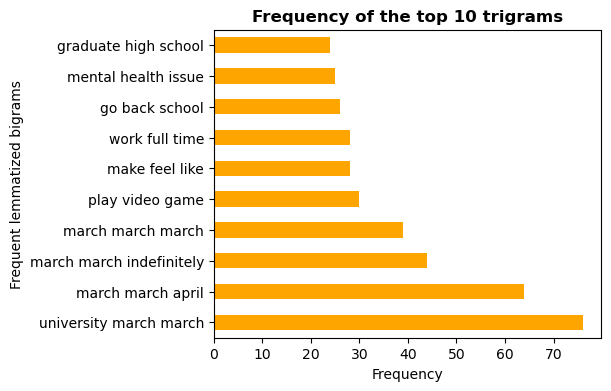

In [153]:
cvec_trigrams_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', color = 'orange', figsize = (5, 4));
plt.xlabel("Frequency")
plt.ylabel("Frequent lemmatized bigrams")
plt.title("Frequency of the top 10 trigrams", weight ='bold', fontsize = 12);